### **Applying the concept of Outlier detection by using IQR Detection and Outlier treatment both by Capping and Trimming**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/placement.csv')

In [3]:
data.shape

(1000, 3)

In [4]:
data.sample(6)

,cgpa,placement_exam_marks,placed
774,6.93,69.0,0
985,7.10,26.0,0
568,8.13,4.0,0
125,7.46,55.0,1
924,6.85,23.0,1
937,6.42,34.0,0


#### **Checking whether the distribution is Normal or Skewed as IQR is only applied on Skewed pdf**

<ipython-input-6-cd8583de2535>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cgpa'], hist=False)
<ipython-input-6-cd8583de2535>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'], hist=False)


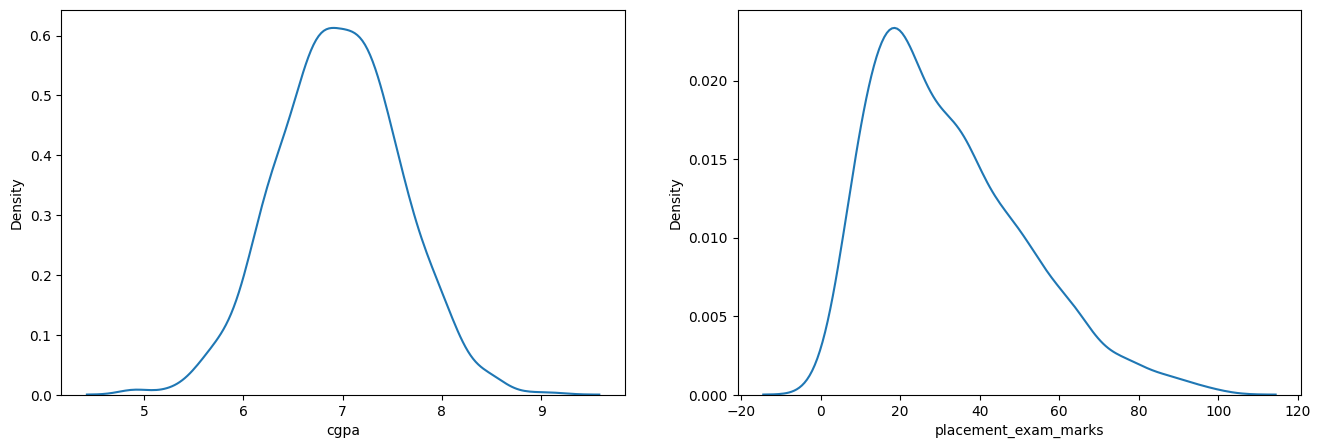

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['cgpa'], hist=False)

plt.subplot(1,2,2)
sns.distplot(data['placement_exam_marks'], hist=False)

plt.show()
#As placement_exam_marks is Skewed distributed so we can apply IQR on it but not on cgpa

In [7]:
data['placement_exam_marks'].skew()

0.8356419499466834

In [8]:
print("Mean value of placement",data['placement_exam_marks'].mean())
print("Std value of placement",data['placement_exam_marks'].std())
print("Min value of placement",data['placement_exam_marks'].min())
print("Max value of placement",data['placement_exam_marks'].max())

Mean value of placement 32.225
Std value of placement 19.13082233892112
Min value of placement 0.0
Max value of placement 100.0


In [9]:
data['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

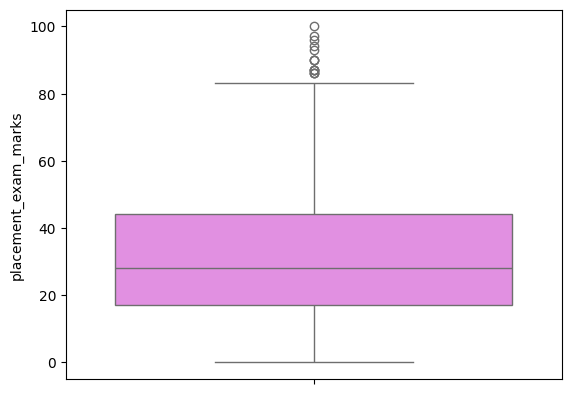

In [12]:
sns.boxplot(data['placement_exam_marks'], color='violet')

#### **Finding IQR**

In [14]:
percentile25 = data['placement_exam_marks'].quantile(0.25)
percentile75 = data['placement_exam_marks'].quantile(0.75)

In [15]:
percentile25, percentile75

(17.0, 44.0)

In [16]:
iqr = percentile75 - percentile25
iqr

27.0

#### **Finding the Boundary values(max & min)**

In [17]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [18]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


#### **Finding the Outliers**

In [20]:
data[data['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [21]:
data[data['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### **Applying Outliers Treatment**

#### **1.Trimming**

In [22]:
new_data =  data[data['placement_exam_marks'] < upper_limit]
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


#### **Comparing the visualization after and before removing outliers**

<ipython-input-24-7ba365c3fd4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])
<ipython-input-24-7ba365c3fd4e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['placement_exam_marks'])


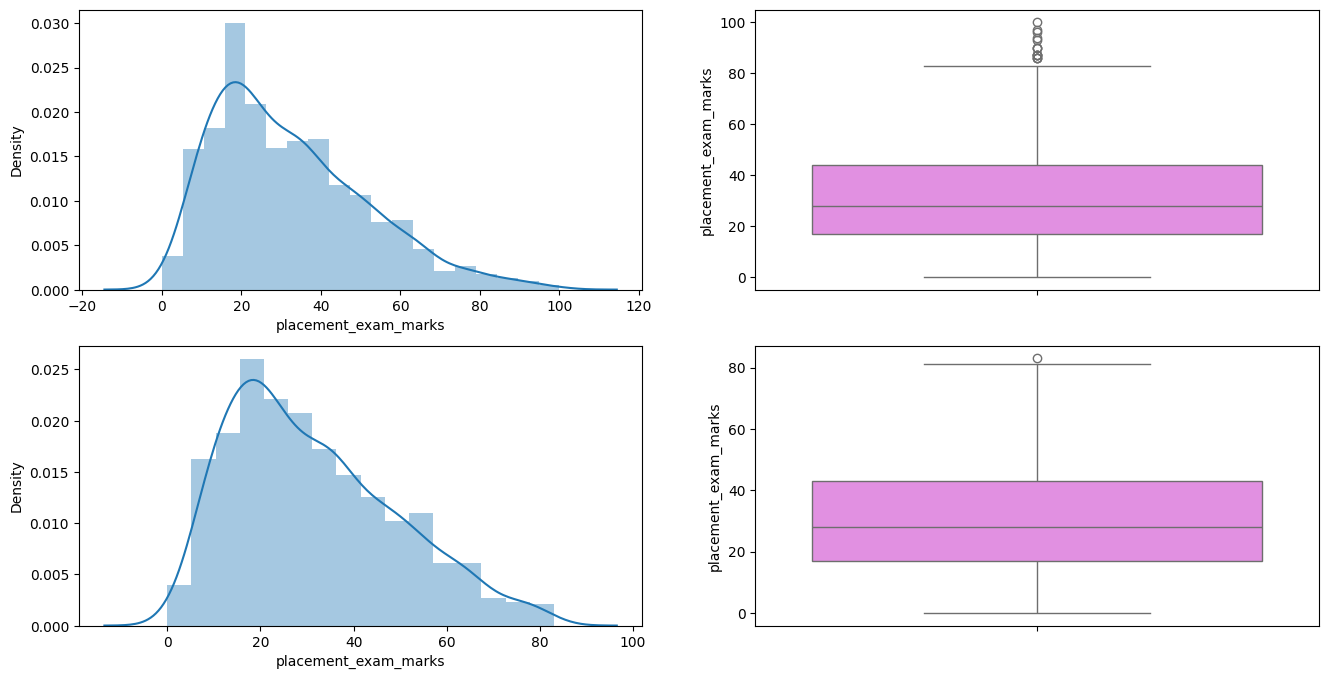

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'], color='violet')

plt.subplot(2,2,3)
sns.distplot(new_data['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_data['placement_exam_marks'], color='violet')

plt.show()

#### **2.Capping**

In [25]:
new_df_cap = data.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [26]:
data.shape

(1000, 3)

In [ ]:
data['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

<ipython-input-27-d4d0a2ed8e07>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['placement_exam_marks'])
<ipython-input-27-d4d0a2ed8e07>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])


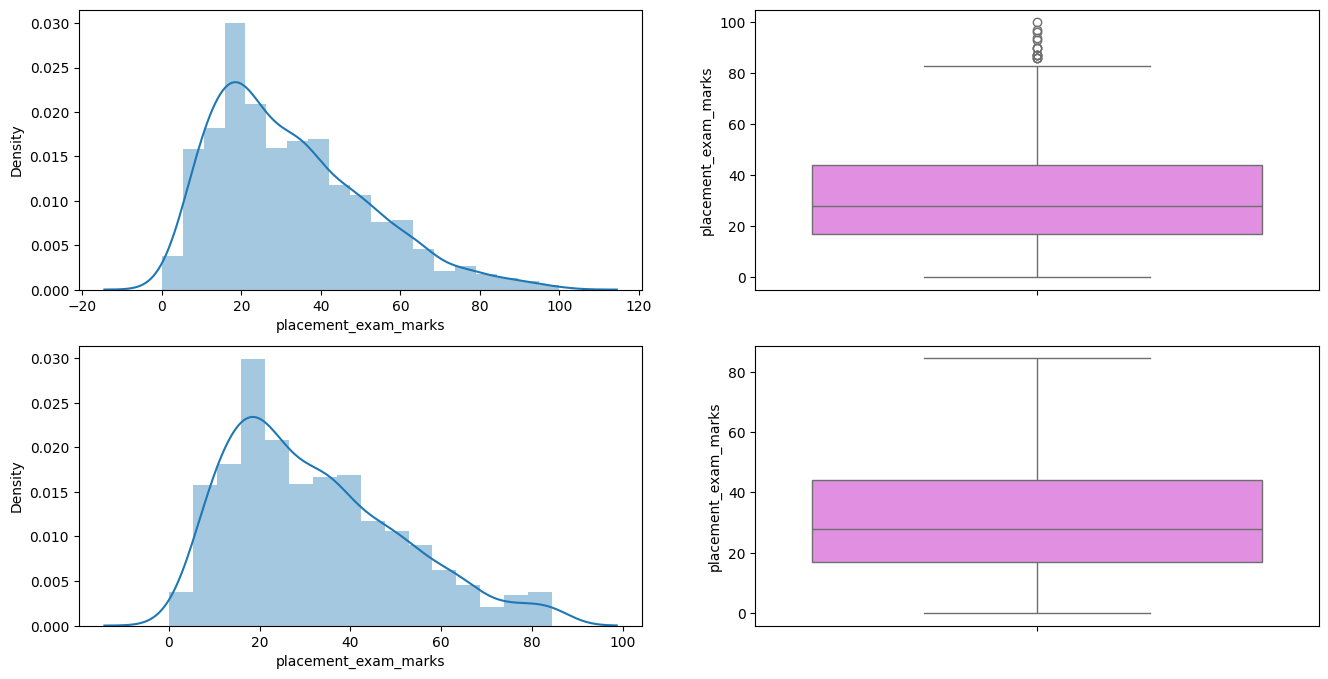

In [27]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(data['placement_exam_marks'], color='violet')

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'], color='violet')

plt.show()